In [2]:
import sys
sys.path.append("..")

import numpy as np
import jax.numpy as jnp
import jax
import scipy.linalg
import scipy.optimize
import matplotlib.pyplot as plt

import pyequion2
import tmcdiff.builder

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
eqsys = pyequion2.EquilibriumBackend(["Na", "Cl", "Ca", "C"], from_elements=True, backend="jax", logbase="e")

In [5]:
eqsys.elements

['H', 'O', 'Na', 'Cl', 'C', 'Ca']

In [6]:
{sp: k for sp, k in zip(eqsys.species, eqsys.get_standard_chemical_potentials(298.15))}

{'H2O': DeviceArray(-237172.17, dtype=float32),
 'CO2': DeviceArray(-385941.53, dtype=float32),
 'CO3--': DeviceArray(-527900., dtype=float32),
 'Ca++': DeviceArray(-553040., dtype=float32),
 'CaCO3': DeviceArray(-1099350., dtype=float32),
 'CaHCO3+': DeviceArray(-1146208.4, dtype=float32),
 'CaOH+': DeviceArray(-717263.8, dtype=float32),
 'Cl-': DeviceArray(-131260., dtype=float32),
 'H+': DeviceArray(0., dtype=float32),
 'HCO3-': DeviceArray(-586857.2, dtype=float32),
 'Na+': DeviceArray(-261890., dtype=float32),
 'Na2CO3': DeviceArray(-1055515.8, dtype=float32),
 'NaCO3-': DeviceArray(-797039.2, dtype=float32),
 'NaHCO3': DeviceArray(-847320.2, dtype=float32),
 'NaOH': DeviceArray(-418122.6, dtype=float32),
 'OH-': DeviceArray(-157290., dtype=float32)}

In [7]:
builder = tmcdiff.builder.FixedGridTransportBuilder(eqsys, 298.15, 0.1, 1e-6, jnp.array([65, 56, 75.0, 28.0, 0.0]), ["Calcite"])
builder.set_species(['CaCO3', 'CaHCO3+', 'CaOH+', 'Na2CO3', 'NaCO3-', 'NaHCO3', 'NaOH', 'CaOH+',
                     'H+', 'OH-'])
builder.make_grid(30, 5)
builder.set_initial_guess()
builder.species

AttributeError: module 'tmcdiff.builder' has no attribute 'FixedGridTransportBuilder'

In [12]:
sol, sol_simple = builder.solve()

In [13]:
sol_simple.success

False

In [9]:
c = np.exp(builder.logc)

Text(0.5, 0, '$y^+$')

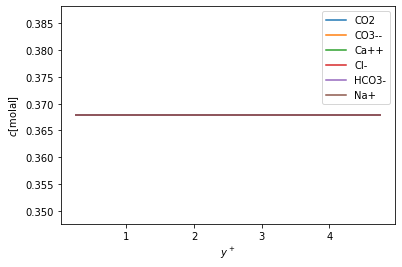

In [114]:
plt.figure()
for i in range(builder.nspecies):
    plt.plot(builder.ygrid, c[i, :], label=builder.species[i])
plt.legend()
plt.ylabel(r'$c$[molal]')
plt.xlabel(r'$y^+$')

In [91]:
def f(cbulk):
    builder.cbulk = cbulk
    _, _ = builder.solve()
    dc = builder.fluxes()[:, -1:]
    dt = 1e-2
    return 4/dt*dc

In [56]:
f(jnp.array([65, 56, 75.0, 28.0, 0.0]))

DeviceArray([[-15.133566 ],
             [ -8.9779005],
             [ -1.6318988],
             [ -2.0280852],
             [-12.711183 ]], dtype=float32)

DeviceArray([[ 0,  0,  1,  0,  0,  0],
             [ 1,  1,  0,  0,  1,  0],
             [ 0,  0,  0,  1,  0,  0],
             [ 0,  0,  0,  0,  0,  1],
             [ 0, -2,  2, -1, -1,  1]], dtype=int32)